In [38]:
import pandas as pd
import numpy as np
import operator as op
import os
import urllib
import string
from ggplot import *
from IPython.display import IFrame
from PIL import Image
import colorsys
from sklearn import feature_selection
import seaborn as sns
import webcolors
from __future__ import unicode_literals
import itertools

%matplotlib inline

We used Kimono to help and get the cereal data from CerealFacts.com

In [ ]:
IFrame('http://cerealfacts.org/', width=1024, height=850)

<img src="../assets/3027659-poster-p-kimono.jpg">

### Let's begin!

In [39]:
## Load in the dataset
df = pd.read_csv('../data/data.csv')

In [40]:
df.describe()

,score,sodium_result,sugar_per_serving,fiber_per_serving,sodium_per_serving,calories_per_serving,serving_size,index
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,55.623077,390.165385,9.130769,3.911538,144.596154,150.480769,40.342308,130.500000
std,11.464072,195.988829,3.960009,2.757206,70.477757,48.265870,12.519411,75.199734
min,26.000000,0.000000,0.000000,0.000000,0.000000,60.000000,19.000000,1.000000
25%,48.000000,258.000000,6.000000,2.000000,110.000000,110.000000,30.000000,65.750000
50%,54.000000,400.000000,9.000000,3.000000,140.000000,120.000000,32.000000,130.500000
75%,58.000000,545.500000,12.000000,5.250000,190.000000,200.000000,55.000000,195.250000
max,82.000000,889.000000,19.000000,14.000000,360.000000,250.000000,62.000000,260.000000


In [41]:
df.target_market.value_counts()

Adult     152
Family     73
Child      34
None        1
dtype: int64

In [42]:
df.head()

,target_market,score,cover_image,sugar_result,fiber_result,sodium_result,sugar_per_serving,fiber_per_serving,sodium_per_serving,calories_per_serving,serving_size,index,url
0,Family,50,http://cerealfacts.org/media/cereal_images/Ann...,24%,3%,293,7,1,85,120,29,1,http://cerealfacts.org/cereal_nutrition_scores...
1,Family,52,http://cerealfacts.org/media/cereal_images/Ann...,24%,3%,310,7,1,90,110,29,2,http://cerealfacts.org/cereal_nutrition_scores...
2,Family,50,http://cerealfacts.org/media/cereal_images/Ann...,24%,3%,293,7,1,85,120,29,3,http://cerealfacts.org/cereal_nutrition_scores...
3,Family,64,http://cerealfacts.org/media/cereal_images/Ann...,7%,3%,379,2,1,110,120,29,4,http://cerealfacts.org/cereal_nutrition_scores...
4,Family,58,http://cerealfacts.org/media/cereal_images/Bar...,23%,10%,267,7,3,80,120,30,5,http://cerealfacts.org/cereal_nutrition_scores...


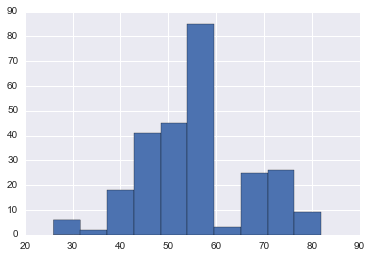

In [43]:
df.score.hist();

### Data pre-processing

In [44]:
pd.set_option("display.max_columns", 50)

In [45]:
df['sugar_result_perc'] = df.sugar_result.str.replace('%','').astype(int)
df['fiber_result_perc'] = df.fiber_result.str.replace('%','').astype(int)
df['calories_result_ratio'] = df.calories_per_serving / df.serving_size 

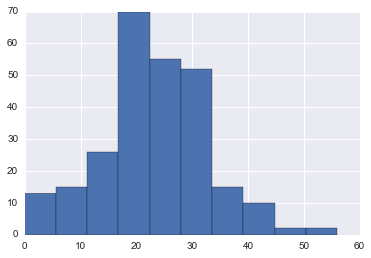

In [46]:
df.sugar_result_perc.hist();

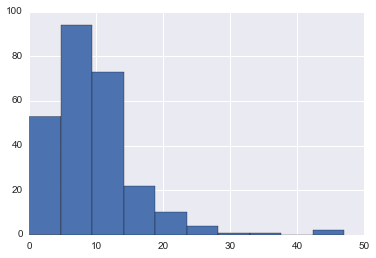

In [47]:
df.fiber_result_perc.hist();

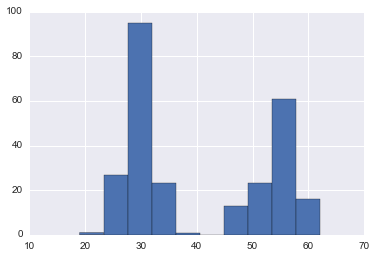

In [48]:
df.serving_size.hist();

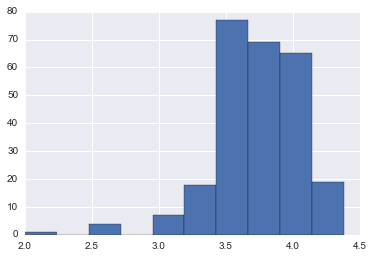

In [49]:
df.calories_result_ratio.hist();

In [50]:
df.iloc[:,-3:].describe()

,sugar_result_perc,fiber_result_perc,calories_result_ratio
count,260.000000,260.000000,260.000000
mean,23.350000,9.323077,3.734876
std,9.734536,6.290540,0.330563
min,0.000000,0.000000,2.000000
25%,18.000000,5.750000,3.571429
50%,23.000000,8.500000,3.728814
75%,30.000000,11.000000,4.000000
max,56.000000,47.000000,4.385965


In [ ]:
df['target_market'].value_counts()

In [ ]:
df = df[df.target_market  != "None"]

In [ ]:
df['target_market'].value_counts()

In [ ]:
pd.get_dummies(df['target_market']).head()

In [ ]:
df = pd.concat([df, pd.get_dummies(df['target_market'])], axis=1)

In [82]:
df.to_csv('cleaned.csv')

In [53]:
## 
def gen_file_name(row):
    file_name = row.cover_image.split('/')[len(row.cover_image.split('/'))-1]
    file_name = 'img_' + str(row['index']).zfill (3) + '_' + (file_name).lower()
    #print('Processing ' + str(row['index']))
    return(file_name)

## 
def gen_cropped_file_path(row):
    file_name = row.file_name
    path_name = '../img/cropped/' + string.replace(file_name, '.jpg', '_cropped.png')
    return(path_name)
    #file_name = 'img_' + str(row['index']).zfill (3) + '_' + (file_name).lower()
    #print('Processing ' + str(row['index']))
    #return(file_name)

In [54]:
df['file_name'] = df.apply(gen_file_name, axis=1)
df['cropped_path'] = df.apply(gen_cropped_file_path, axis=1)

In [ ]:
df.head()

In [ ]:
## The following code download the image with the URL privedes in the csv
'''
for name, url in zip(df.file_name, df.cover_image):
    if (os.path.isfile('../img/' + name) == False):
        resource = urllib.urlopen(url)
        output = open('../img/' + name, 'wb')
        output.write(resource.read())
        output.close()
'''

In [ ]:
for file_name in df.file_name:
    if not (os.path.isfile('../img/cropped/' + string.replace(file_name, '.jpg', '_cropped.png'))):
        img = Image.open('../img/' + file_name)
        img = img.convert("RGBA")
        pixdata = img.load()
        for y in xrange(img.size[1]):
            for x in xrange(img.size[0]):
                if pixdata[x, y] == (255, 255, 255, 255):
                    pixdata[x, y] = (255, 255, 255, 0)
        img.save('../img/cropped/' + string.replace(file_name, '.jpg', '_cropped.png'), "PNG")

## Cropping whitespace

In [56]:
df.ix[1,'file_name']

u'img_002_annieshoneybunnies.jpg'

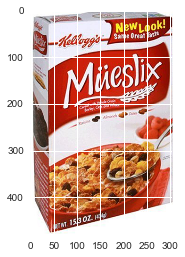

In [68]:
from skimage import io, img_as_float
import matplotlib.pyplot as plt
import numpy as np


image = img_as_float(io.imread('../img/' + df.ix[130,'file_name']))

# Select all pixels almost equal to white
# (almost, because there are some edge effects in jpegs
# so the boundaries may not be exactly white)
white = np.array([1, 1, 1])
mask = np.abs(image - white).sum(axis=2) < 0.05

# Find the bounding box of those pixels
coords = np.array(np.nonzero(~mask))
top_left = np.min(coords, axis=1)
bottom_right = np.max(coords, axis=1)

out = image[top_left[0]:bottom_right[0],
            top_left[1]:bottom_right[1]]

plt.imshow(out)
plt.show()

In [77]:
from PIL import Image, ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    if bbox:
        return im.crop(bbox)

im = Image.open('../img/' + df.ix[130,'file_name'])
im = trim(im)
im.show()

In [74]:
top_left

array([16, 96])

AxesImage(60,40;372x248)
AxesImage(60,40;372x248)


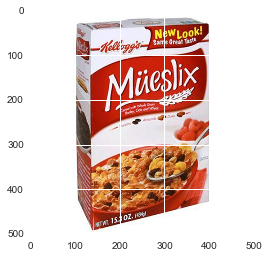

In [75]:
print plt.imshow(out);
print plt.imshow(image);

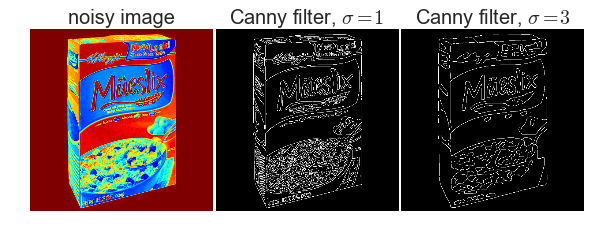

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature
from skimage.color import rgb2grey

# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

im = rgb2grey(img_as_float(io.imread('../img/' + df.ix[130,'file_name'])))

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [ ]:
http://blog.yhathq.com/posts/image-processing-with-scikit-image.html

In [ ]:
## Helper function to get the RGB and HSL

def open_convert_image(input_img_file, numcolors=1):
    image = Image.open(input_img_file)
    result = image.convert('P', palette=Image.ADAPTIVE, colors=numcolors)
    result.putalpha(0)
    return(result)

def get_list_color(input_img_file, numcolors=1):
    return(open_convert_image(input_img_file, numcolors).getcolors())

def get_rgb_list(input_img_file, numcolors=2):
    colors_list = get_list_color(input_img_file, numcolors)
    result = []
    for color in colors_list:
        result.append(list(color[1][0:3]))
    return(result)

def df_get_rgb_list(row, numcolors=3):
    return(get_rgb_list(row.cropped_path, numcolors))

def get_hls_list(input_img_file, numcolors=1):
    result = []
    for rgb_set in get_rgb_list(input_img_file, numcolors):
        result.append(list(colorsys.rgb_to_hls(*[x/255.0 for x in rgb_set])))
    return(result)

def df_get_hls_list(row, numcolors=1):
    return(list(get_hls_list(row.cropped_path, numcolors))[numcolors - 1])

def df_get_h(row):
    return(list(get_hls_list(row.cropped_path, numcolors)[0]))

def hls(row, numcolors=1):
    return(list(get_hls_list(row, numcolors))[numcolors - 1])

def rgb(row, numcolors=1):
    return(get_rgb_list(row, numcolors)[numcolors - 1])

def closest_colour(requested_colour):
    pri_color = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Violet', 'Brown', 'Black', 'Grey', 'White']
    pri_color = [x.lower() for x in pri_color]
    min_colours = {}
    #for key, name in webcolors.css3_hex_to_names.items():
    for key, name in [x for x in itertools.ifilter(lambda x: x[1]  in pri_color, webcolors.css3_hex_to_names.items())]:
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour, result_act = False):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
        actual_name = None
    if result_act:
        return actual_name, closest_name
    return closest_name

In [ ]:
rgb(df.iloc[0,:].cropped_path, 2)

In [ ]:
hls(df.iloc[0,:].cropped_path, 2)

In [ ]:
for num in range(1, 4):
    hls_color = lambda x: hls(x, num)
    rgb_color = lambda x: rgb(x, num)
    rgb_name = lambda x: get_colour_name(x)
    pri_rgb_color = lambda x: webcolors.name_to_rgb(x)
    
    df['color_org_h' + str(num)], df['color_org_l' + str(num)], df['color_org_s' + str(num)] = zip(*df['cropped_path'].map(hls_color))
    #df['color_r' + str(num)], df['color_g' + str(num)], df['color_b' + str(num)] = zip(*df['cropped_path'].map(rgb_color))
    df['color_hls' + str(num)] = df['cropped_path'].map(hls_color)
    df['color_rgb' + str(num)] = df['cropped_path'].map(rgb_color)
    df['color_rgb_name' + str(num)] = df['color_rgb' + str(num)].map(rgb_name)
    df['color_rgb_pri' + str(num)] = df['color_rgb_name' + str(num)].map(pri_rgb_color)
    df['color_r' + str(num)], df['color_g' + str(num)], df['color_b' + str(num)] = zip(*df['color_rgb_name' + str(num)].map(pri_rgb_color))

In [ ]:
for num in range(1, 4):
    df_dummy = pd.get_dummies(df['color_rgb_name' + str(num)])
    df_dummy.columns = ['color_' + str(num) + '_' + x for x in list(df_dummy.columns.values)]
    df = pd.concat([df, df_dummy], axis=1)

In [ ]:
df.head()

In [ ]:
pd.concat([df, pd.get_dummies(df['color_rgb_name1'], prefix_sep = ['color_1_'])], axis=1)

In [ ]:
min(abs(0.45 - 0.50), abs(0.65 - 0.50), abs(0.51 - 0.50))

In [ ]:
#plus = lambda x: hls(x, num)
(pd.concat([(df['color_org_s1'] * df['color_org_l1'] - 0.5).abs(), (df['color_org_s2'] * df['color_org_l2'] - 0.5).abs(), (df['color_org_s3'] * df['color_org_l3'] - 0.5).abs()], axis=1).min(axis=1))


In [ ]:
df["color_diff"] = pd.concat([(df['color_org_s1'] * df['color_org_l1'] - 0.5).abs(), (df['color_org_s2'] * df['color_org_l2'] - 0.5).abs(), (df['color_org_s3'] * df['color_org_l3'] - 0.5).abs()], axis=1).std(axis=1)
df["color_diff"] = pd.concat([(df['color_org_s1'] * df['color_org_l1'] - 0.5).abs(), (df['color_org_s2'] * df['color_org_l2'] - 0.5).abs(), (df['color_org_s3'] * df['color_org_l3'] - 0.5).abs()], axis=1).std(axis=1)

In [ ]:
pd.concat([(df['color_org_s1'] * df['color_org_l1'] - 0.5).abs(), (df['color_org_s2'] * df['color_org_l2'] - 0.5).abs(), (df['color_org_s3'] * df['color_org_l3'] - 0.5).abs()], axis=1).std(axis=1).describe()

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
col_list = list(df.columns.values)

In [ ]:
col_list = col_list[16:]

In [ ]:
col_list

In [ ]:
'''
col_list.remove('target_market')
col_list.remove('cover_image')
col_list.remove('url')
col_list.remove('score')
col_list.remove('index')
'''
col_list.remove('cropped_path')
col_list.remove('file_name')
col_list.remove('color_rgb_name1')
col_list.remove('color_rgb_name2')
col_list.remove('color_rgb_name3')
col_list.remove('color_hls1') 
col_list.remove('color_rgb1')
col_list.remove('color_hls2') 
col_list.remove('color_rgb2')
col_list.remove('color_hls3') 
col_list.remove('color_rgb3')
col_list.remove('color_rgb_pri1')
col_list.remove('color_rgb_pri2')
col_list.remove('color_rgb_pri3')

In [ ]:
df[col_list].head()

In [ ]:
X = df[col_list]
#y = df.sugar_result_perc
y = df.fiber_result_perc

In [ ]:
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=1,
       random_state=0)
scores = cross_val_score(clf, X, y)
print "DecisionTreeClassifier:", scores.mean()

## RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
     min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y)
print "RandomForestClassifier:", scores.mean()

## ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y)
print "ExtraTreesClassifier:  ", scores.mean()

In [ ]:
## RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
     min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y)
print "RandomForestClassifier:", scores.mean()

## ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, max_depth=None,
    min_samples_split=1, random_state=0)
scores = cross_val_score(clf, X, y)
print "ExtraTreesClassifier:  ", scores.mean()

In [ ]:
df.fiber_result_perc.describe()

In [ ]:
df.sugar_result_perc.describe()

In [ ]:
def setFiber(fiber):
    result = ""
    if fiber >= 11:
        result = "Good"
    elif fiber <= 6:
        #result = "Bad"
        result = "Average"
    else:
        result = "Average"
    return(result)
set_fiber = lambda x: setFiber(x)

def setSugar(sugar):
    result = ""
    if sugar >= 30:
        #result = "Bad"
        result = "Average"
    elif sugar <= 18:
        result = "Good"
    else:
        result = "Average"
    return(result)
set_sugar = lambda x: setSugar(x)

df['fiber_label'] = df['fiber_result_perc'].map(set_fiber)
df['sugar_label'] = df['sugar_result_perc'].map(set_sugar)

In [ ]:
##balance the class
import random
print(df.fiber_label.value_counts())
#random.sample(df[df.fiber_label == 'Good'].index, 180)
idx_good = [random.choice(df[df.fiber_label == 'Good'].index) for _ in range(200)]
idx_average = [random.choice(df[df.fiber_label == 'Average'].index) for _ in range(200)]
idx = idx_good + idx_average

In [ ]:
X = df[col_list]
X = X[idx:]
#y = df.sugar_result_perc
y = df.fiber_label

## RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
     min_samples_split=10, random_state=0)
scores = cross_val_score(clf, X, y, cv = 5)
print "RandomForestClassifier:", scores.mean()

## ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, max_depth=None,
    min_samples_split=10, random_state=0)
scores = cross_val_score(clf, X, y, cv = 5)
print "ExtraTreesClassifier:  ", scores.mean()

In [ ]:
X = df[col_list]
#y = df.sugar_result_perc
y = df.sugar_label

## RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=None,
     min_samples_split=10, random_state=0)
scores = cross_val_score(clf, X, y, cv = 5)
print "RandomForestClassifier:", scores.mean()

## ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, max_depth=None,
    min_samples_split=10)
scores = cross_val_score(clf, X, y, cv = 5)
print "ExtraTreesClassifier:  ", scores.mean()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split

clf.fit(X, y)
confusion_matrix(y, clf.predict(X))

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y, clf.predict(X)))

In [ ]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(x_train, y_train)

print(confusion_matrix(y_test, clf.predict(x_test)))
print(classification_report(y_test, clf.predict(x_test)))

In [ ]:
df['color_rgb_name1'].value_counts()

In [ ]:
df['color_rgb_name2'].value_counts()

In [ ]:
df['color_rgb_name3'].value_counts()

In [ ]:
from scipy.spatial import distance

the_max_dist = 0
for each_comb in [x for x in itertools.combinations('012', 2)]:
    a = df['color_rgb1'][1][int(each_comb[0])]
    b = df['color_rgb1'][1][int(each_comb[1])]
    dst = distance.euclidean(a,b)
    the_max_dist = max(dst, the_max_dist)

print(the_max_dist)



In [ ]:
[x for x in itertools.combinations('012', 2)][1][0]

In [ ]:
df['color_rgb1'][1]

In [ ]:
webcolors.css3_hex_to_names.items()[1][1]

In [ ]:
3 in [1, 2, 3]

In [ ]:
len(df['color_rgb_name2'].value_counts())

In [ ]:
len(df['color_rgb_name3'].value_counts())

In [ ]:
rgb_name = lambda x: get_colour_name(x)
#df['color_rgb1_name'] = df['color_rgb1'].map(rgb_name)
df['color_rgb1'].map(rgb_name)

In [ ]:
requested_colour = (119, 172, 152)
closest_name = get_colour_name(requested_colour)

print "Closest colour name:", closest_name

In [ ]:
df.loc[140,]

In [ ]:


ggplot(df, aes(x='sugar_result', y='serving_size', color='target_market ')) +\
    geom_point(position = "jitter") +\
    scale_color_brewer(type='qual') +\
    xlab("Sugar Per Serving") + ylab("Serving Size") + ggtitle("Cereal (Sugar)") +\
    facet_wrap("target_market", scales="free_x")

###EDA

Suger Per Serving
 - Interesting to see larger serving size does not have a hight correlation to the sugar
 - Is unstandable to see cereal which have child as targeted market has smaller serving size
 - Interesting to see cereal which have adult as targeted market has two culster of serving size
 - There seems to be a data point missing target_market 

In [ ]:
ggplot(df, aes(x='sugar_per_serving', y='serving_size', color='target_market ')) +\
    geom_point(position = "jitter") +\
    scale_color_brewer(type='qual') +\
    xlab("Sugar Per Serving") + ylab("Serving Size") + ggtitle("Cereal (Sugar)") +\
    facet_wrap("target_market", scales="free_x")

* * * * *

Let's remove those has no target market

In [ ]:
df = df[df.target_market  != "None"]

* * * * *

Fiber Per Serving
 - Only Family cereal has a strong corelation to the serving size

In [ ]:
ggplot(df, aes(x='fiber_per_serving', y='serving_size', color='target_market ')) +\
    geom_point(position = "jitter") +\
    scale_color_brewer(type='qual') +\
    xlab("Fiber Per Serving") + ylab("Serving Size") + ggtitle("Cereal (Fiber)") +\
    facet_wrap("target_market", scales="free_x")

In [ ]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="fiber_per_serving", y="serving_size", col="target_market", hue="target_market", col_wrap=3
           , data=df)

* * * * *

Sodium Per Serving
 - Interesting to see only Adult and Family offer ZERO sodium cereal

In [ ]:
ggplot(df, aes(x='sodium_per_serving ', y='serving_size', color='target_market ')) +\
    geom_point(position = "jitter") +\
    scale_color_brewer(type='qual') +\
    xlab("Sodium Per Serving") + ylab("Serving Size") + ggtitle("Cereal (Sodium)") +\
    facet_wrap("target_market", scales="free_x")

* * * * *

Calories Per Serving
 - Is safe to say that the bigger serving it is, the more calories it has. No exception

In [ ]:
ggplot(df, aes(x='calories_per_serving  ', y='serving_size', color='target_market ')) +\
    geom_point(position = "jitter") +\
    scale_color_brewer(type='qual') +\
    xlab("Calories Per Serving") + ylab("Serving Size") + ggtitle("Cereal (Calories)") +\
    facet_wrap("target_market", scales="free_x")

In [ ]:
sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="calories_per_serving", y="serving_size", col="target_market", hue="target_market", col_wrap=3
           , data=df)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rs = np.random.RandomState(10)

# Set up the matplotlib figure
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a historgram and kernel density estimate
sns.distplot(df.calories_per_serving, color="m")

plt.tight_layout()

In [ ]:
import seaborn as sns
sns.set()

sns.pairplot(df, hue="target_market")

In [ ]:
import seaborn as sns
sns.set()

sns.pairplot(df, hue="score")

Features =]

In [ ]:
## 
def gen_file_name(row):
    file_name = row.cover_image.split('/')[len(row.cover_image.split('/'))-1]
    file_name = 'img_' + str(row['index']).zfill (3) + '_' + (file_name).lower()
    #print('Processing ' + str(row['index']))
    return(file_name)

## 
def gen_cropped_file_path(row):
    file_name = row.file_name
    path_name = '../img/cropped/' + string.replace(file_name, '.jpg', '_cropped.png')
    return(path_name)
    #file_name = 'img_' + str(row['index']).zfill (3) + '_' + (file_name).lower()
    #print('Processing ' + str(row['index']))
    #return(file_name)

In [ ]:
df['file_name'] = df.apply(gen_file_name, axis=1)
df['cropped_path'] = df.apply(gen_cropped_file_path, axis=1)

In [ ]:
df.head()

In [ ]:
for name, url in zip(df.file_name, df.cover_image):
    if (os.path.isfile('../img/' + name) == False):
        resource = urllib.urlopen(url)
        output = open('../img/' + name, 'wb')
        output.write(resource.read())
        output.close()

In [ ]:
for file_name in df.file_name:
    if (os.path.isfile('../img/cropped/' + string.replace(file_name, '.jpg', '_cropped.png')) == False):
        img = Image.open('../img/' + file_name)
        img = img.convert("RGBA")
        pixdata = img.load()
        for y in xrange(img.size[1]):
            for x in xrange(img.size[0]):
                if pixdata[x, y] == (255, 255, 255, 255):
                    pixdata[x, y] = (255, 255, 255, 0)
        img.save('../img/cropped/' + string.replace(file_name, '.jpg', '_cropped.png'), "PNG")

In [ ]:
## Helper function to get the RGB and HSL

def open_convert_image(input_img_file, numcolors=1):
    image = Image.open(input_img_file)
    result = image.convert('P', palette=Image.ADAPTIVE, colors=numcolors)
    result.putalpha(0)
    return(result)

def get_list_color(input_img_file, numcolors=1):
    return(open_convert_image(input_img_file, numcolors).getcolors())

def get_rgb_list(input_img_file, numcolors=2):
    colors_list = get_list_color(input_img_file, numcolors)
    result = []
    for color in colors_list:
        result.append(list(color[1][0:3]))
    return(result)

def df_get_rgb_list(row, numcolors=3):
    return(get_rgb_list(row.cropped_path, numcolors))

def get_hls_list(input_img_file, numcolors=1):
    result = []
    for rgb_set in get_rgb_list(input_img_file, numcolors):
        result.append(list(colorsys.rgb_to_hls(*[x/255.0 for x in rgb_set])))
    return(result)

def df_get_hls_list(row, numcolors=1):
    return(list(get_hls_list(row.cropped_path, numcolors))[numcolors - 1])

def df_get_h(row):
    return(list(get_hls_list(row.cropped_path, numcolors)[0]))

def hls(row, numcolors=1):
    return(list(get_hls_list(row, numcolors))[numcolors - 1])

def rgb(row, numcolors=1):
    return(get_rgb_list(row, numcolors)[numcolors - 1])



In [ ]:
for num in range(1, 4):
    hls_color = lambda x: hls(x, num)
    rgb_color = lambda x: rgb(x, num)

    df['color_h' + str(num)], df['color_l' + str(num)], df['color_s' + str(num)] = zip(*df['cropped_path'].map(hls_color))
    df['color_r' + str(num)], df['color_g' + str(num)], df['color_b' + str(num)] = zip(*df['cropped_path'].map(rgb_color))

In [ ]:
def setScore(score):
    result = ""
    if score >= 58:
        result = "Good"
    elif score < 48:
        result = "Bad"
    else:
        result = "Average"
    return(result)
set_score = lambda x: setScore(x)

df['score_label'] = df['score'].map(set_score)



In [ ]:
df['score_label']

In [ ]:
import seaborn as sns
sns.set()

sns.pairplot(df, hue="score_label")

In [ ]:
df.corr().fiber_per_serving 

In [ ]:
g = sns.PairGrid(df, vars=["color_h1", "color_l1", "color_s1"],
                 hue="score_label", aspect=1, size=5)
g.map(plt.scatter)

In [ ]:
g = sns.PairGrid(df, vars=["color_r1", "color_g1", "color_b1"],
                 hue="score_label", aspect=1, size=5)
g.map(plt.scatter)

In [ ]:
np.log(df.color_r1)

In [ ]:
df_log = np.log(df[s for s in list(df.columns.values) if 'color' in s])

In [ ]:
[s for s in list(df.columns.values) if 'color' in s]

In [ ]:
df_log = np.log(df.loc[:, [s for s in list(df.columns.values) if 'color' in s]])

In [ ]:
df_log = np.log(df.loc[:,'color_h1':'color_b3'])

In [ ]:
df_log['score_label'] = df.score_label

In [ ]:
df_log.head()

In [ ]:
g = sns.PairGrid(df_log, vars=["color_r1", "color_g1", "color_b1"],
                 hue="score_label", aspect=1, size=5)
g.map(plt.scatter)

In [ ]:
df.corr().score

In [ ]:
df.corr().sugar_per_serving

In [ ]:
df.corr().fiber_per_serving

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
X = df.drop(['score'], axis=1)
y = df['score']

In [ ]:
X = df.ix[:,16:33]

In [ ]:
X.head()

In [ ]:
F = feature_selection.f_classif(X, y)[0]
title = 'Cereal Features with F-Values'
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=df.columns[16:33],y=F)
ax.set_title(title)
ax.set(xlabel="Features");


In [ ]:
X = df.drop(['score'], axis=1)
y = df['score_label']
X = df.ix[:,16:33]
F = feature_selection.f_classif(X, y)[0]
title = 'Cereal Features with F-Values'
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=df.columns[16:33],y=F)
ax.set_title(title)
ax.set(xlabel="Features");

In [ ]:
X = df.ix[:,16:33]

In [ ]:
X

In [ ]:
X = df.drop(['score'], axis=1)
y = df['score_label']
X = df.ix[:,16:33]
F = feature_selection.f_classif(X, y)[0]
title = 'Cereal Features with F-Values'
plt.figure(figsize=(13, 8))
ax = sns.barplot(x=df.columns[16:33],y=F)
ax.set_title(title)
ax.set(xlabel="Features");

In [ ]:
zip(*df.head()['rgb_list'])

In [ ]:
get_hls_list('../img/cropped/img_001_anniesfruitybunnies_cropped.png', 1)

In [ ]:
df['hls_list'] = df.apply(df_get_hls_list, axis=1)

#get_rgb_list('../img/cropped/img_001_anniesfruitybunnies_cropped.png', 3)

In [ ]:
df['score'].describe()


In [ ]:
df['h'], df['l'], df['s'] = zip(*df.apply(df_get_hls_list, axis=1))

In [ ]:




hls_color = lambda x: hls(x, 2)

zip(*df['cropped_path'].map(hls_color))

In [ ]:
zip(*df.apply(df_get_hls_list, axis=1))

In [ ]:
df["hls_list"].str

In [ ]:
df.head()